<a href="https://colab.research.google.com/github/Mominul-Islam-cmd/Road-Condition-Detection-and-Crowdsourced-Data-Collection-for-Accident-Prevention/blob/main/Road_ResNet_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.utils.data as data


data_dir = '/content/drive/MyDrive/Research_paper/Data/new multiclass update data/train'
input_size = 128
batch_size = 32
num_classes = 3


data_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(data_dir, transform=data_transforms)


train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = data.random_split(dataset, [train_size, val_size])


train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

#  Load and Modify ResNet Model
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#  Train the Model
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    train_correct = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        train_correct += (predicted == labels).sum().item()

    train_loss = train_loss / len(train_dataset)
    train_accuracy = 100.0 * train_correct / len(train_dataset)

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_dataset)
    val_accuracy = 100.0 * val_correct / len(val_dataset)

    # Print epoch statistics
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.2f}%")
    print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_accuracy:.2f}%")
    print('-' * 50)


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also u

Epoch 1/10
Train Loss: 0.5960 | Train Accuracy: 75.31%
Val Loss: 0.3679 | Val Accuracy: 85.53%
--------------------------------------------------
Epoch 2/10
Train Loss: 0.2979 | Train Accuracy: 87.82%
Val Loss: 0.3538 | Val Accuracy: 86.18%
--------------------------------------------------
Epoch 3/10
Train Loss: 0.1401 | Train Accuracy: 95.17%
Val Loss: 0.3505 | Val Accuracy: 87.17%
--------------------------------------------------
Epoch 4/10
Train Loss: 0.0768 | Train Accuracy: 97.51%
Val Loss: 0.4450 | Val Accuracy: 87.17%
--------------------------------------------------
Epoch 5/10
Train Loss: 0.0453 | Train Accuracy: 98.90%
Val Loss: 0.4439 | Val Accuracy: 86.84%
--------------------------------------------------
Epoch 6/10
Train Loss: 0.0287 | Train Accuracy: 99.34%
Val Loss: 0.4894 | Val Accuracy: 85.86%
--------------------------------------------------
Epoch 7/10
Train Loss: 0.0235 | Train Accuracy: 99.52%
Val Loss: 0.4760 | Val Accuracy: 85.86%
-----------------------------

In [ ]:
test_dataset = datasets.ImageFolder('/content/drive/MyDrive/Research_paper/Data/new multiclass update data/test', transform=data_transforms)
test_loader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

In [ ]:
model.eval()
test_loss = 0.0
test_correct = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

]
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * images.size(0)
        test_correct += (predicted == labels).sum().item()

test_loss = test_loss / len(test_dataset)
test_accuracy = 100.0 * test_correct / len(test_dataset)

print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 0.4728 | Test Accuracy: 86.65%


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

model.eval()


all_predictions = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)


        predicted = predicted.cpu().numpy()
        labels = labels.cpu().numpy()


        all_predictions.extend(predicted)
        all_labels.extend(labels)


cm = confusion_matrix(all_labels, all_predictions)


print("Confusion Matrix:")
print(cm)



/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[110   3   5]
 [  3 112  23]
 [  4   7  70]]


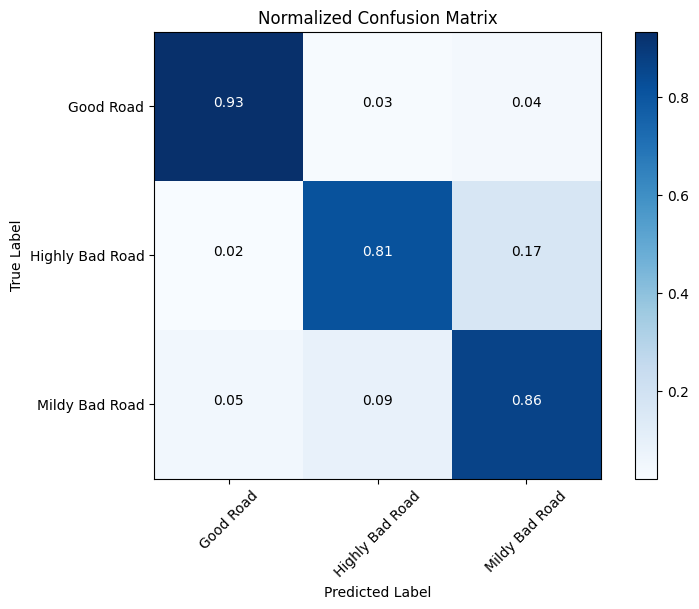

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')


cm = confusion_matrix(all_labels, all_predictions)


class_labels = ['Good Road', 'Highly Bad Road','Mildy Bad Road']


plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report


report = classification_report(all_labels, all_predictions, target_names=class_labels)


print("Classification Report:")
print(report)

Classification Report:
                 precision    recall  f1-score   support

      Good Road       0.94      0.93      0.94       118
Highly Bad Road       0.92      0.81      0.86       138
 Mildy Bad Road       0.71      0.86      0.78        81

       accuracy                           0.87       337
      macro avg       0.86      0.87      0.86       337
   weighted avg       0.88      0.87      0.87       337

